NBEATS EXAMPLE

https://subhayo.wordpress.com/2019/05/15/time-series-analysis-of-monthly-milkelectric-production/

It's a toy example to show how to do time series forecasting using N-Beats.

In [7]:
%matplotlib inline
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import optim
from torch.nn import functional as F

from nbeats_pytorch.model import NBeatsNet
from trainer_pytorch import save
import csv
import pandas as pd

warnings.filterwarnings(action='ignore', message='Setting attributes')

In [8]:
# plot utils.
def plot_scatter(*args, **kwargs):
    plt.plot(*args, **kwargs)
    plt.scatter(*args, **kwargs)


# simple batcher.
def data_generator(x, y, size):
    assert len(x) == len(y)
    batches = []
    for ii in range(0, len(x), size):
        batches.append((x[ii:ii + size], y[ii:ii + size]))
    for batch in batches:
        yield batch

class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss,self).__init__()

    def forward(self,x,y):
        my_loss = torch.mean(torch.abs((x - y)/y))
        return  my_loss


In [4]:
import pandas as pd
from statsmodels.tsa.seasonal import STL

# 读取原始数据
data = pd.read_csv('data/output_avg - Copy.csv', index_col='date', parse_dates=True)

# 创建STL模型并拟合数据
stl = STL(data, period=7)
res = stl.fit()

# 获取趋势、季节性和残差部分的结果
trend, seasonal, residual = res.trend, res.seasonal, res.resid

# 合并数据并保存到CSV文件中
result = pd.concat([trend, seasonal, residual], axis=1)
result.columns = ['trend', 'seasonal', 'residual']
result.to_csv('result.csv')


In [1]:
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/5555.csv', parse_dates=['date'], index_col='date')

# 使用 STL 方法进行分解
from statsmodels.tsa.seasonal import STL
decomp = STL(data,period=365,trend=385,seasonal=91).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid

# # 平滑化 seasonal 和 trend
# seasonal_smoothed = seasonal.rolling(window=7, center=True).mean()
# trend_smoothed = trend.rolling(window=7, center=True).mean()

# 对季节性部分进行指数平滑滤波
seasonal_smoothed = seasonal.ewm(alpha=0.2, adjust=False).mean()

# 对趋势性部分进行指数平滑滤波
trend_smoothed = trend.ewm(alpha=0.2, adjust=False).mean()

# 将 seasonal_smoothed、trend_smoothed 和 residual 合并为一个 DataFrame
df = pd.concat([seasonal_smoothed, trend_smoothed, residual], axis=1)
df.columns = ['seasonal', 'trend', 'residual']

# 对每一行进行求和
df['all_load'] = df.sum(axis=1)

df = df.drop(['seasonal', 'trend', 'residual'], axis=1)

# 将 DataFrame 写入 CSV 文件
# df.to_csv('processed_data1.csv')
# df = pd.DataFrame({'date': data['date'], 'all_load': all_load})
df.to_csv('new_data8.csv')



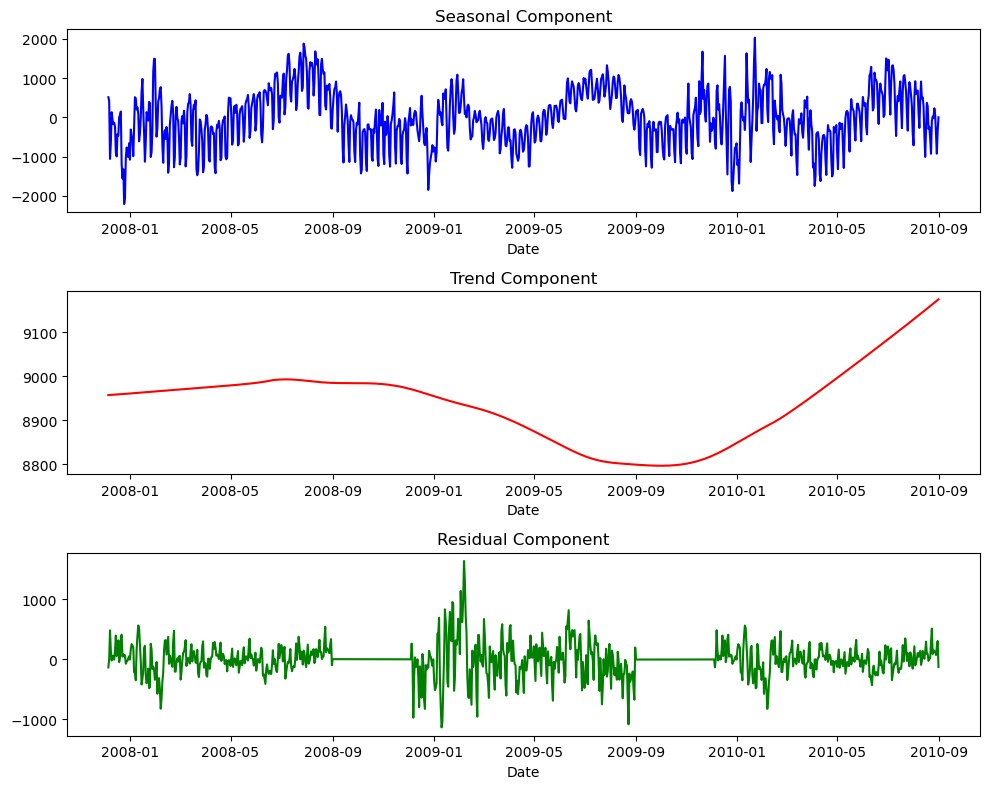

In [4]:
# STL分解只保留季节
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/8888.csv', parse_dates=['date'], index_col='date')

# 使用 STL 方法进行分解
from statsmodels.tsa.seasonal import STL
decomp = STL(data,period=365,trend=399,seasonal=91).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid

# 平滑化 seasonal 和 trend
# seasonal_smoothed = seasonal.rolling(window=7, center=True).mean()
# trend_smoothed = trend.rolling(window=7, center=True).mean()
# residual  = residual.ewm(alpha=0.2, adjust=False).mean()


# 将 seasonal_smoothed、trend_smoothed 和 residual 合并为一个 DataFrame
df = pd.concat([seasonal, trend, residual], axis=1)
df.columns = ['seasonal', 'trend', 'residual']

# 对每一行进行求和
# df['all_load'] = df.sum(axis=1)
# 全
df.to_csv('data/residual/new_data（all）.csv')


import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，将日期作为索引
data = pd.read_csv('data/residual/new_data（all）.csv', index_col='date', parse_dates=True)

# 创建子图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# 绘制季节分量
axes[0].plot(data['seasonal'], color='blue')
axes[0].set_title('Seasonal Component')

# 绘制趋势分量
axes[1].plot(data['trend'], color='red')
axes[1].set_title('Trend Component')

# 绘制残差分量
axes[2].plot(data['residual'], color='green')
axes[2].set_title('Residual Component')

# 设置横轴标签
for ax in axes:
    ax.set_xlabel('Date')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

# 单季节
# df = df.drop(['trend', 'seasonal'], axis=1)
# df.to_csv('data/residual/new_data（residual）.csv')

# 将 DataFrame 写入 CSV 文件
# df.to_csv('processed_data1.csv')
# df = pd.DataFrame({'date': data['date'], 'all_load': all_load})
# df.to_csv('new_data1.csv')


In [ ]:
# 当趋势部分的数据呈现非线性变化趋势时，多项式回归模型可以用来拟合数据。在Python中，使用numpy和scikit-learn库可以实现多项式回归模型的拟合。下面是一个简单的示例代码，帮助您理解如何在Python中使用多项式回归模型拟合数据。
#
# 假设我们有一个趋势部分的数据y，对其进行多项式回归拟合。我们可以使用numpy库中的polyfit()函数来实现多项式回归模型的拟合。该函数的参数包括待拟合的自变量x，因变量y以及多项式的次数deg。以下是代码示例：
# 拟合trend曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 输入的趋势数据
y = [1, 3, 5, 8, 12, 15, 20, 25, 30]

# 创建多项式特征
poly = PolynomialFeatures(degree=3)

# 将输入的趋势数据转换为多项式特征
X_poly = poly.fit_transform(np.array(range(len(y))).reshape(-1, 1))

# 创建线性回归模型
regressor = LinearRegression()

# 拟合多项式回归模型
regressor.fit(X_poly, y)

# 绘制原始数据和拟合曲线
plt.scatter(np.array(range(len(y))), y, color='red')
plt.plot(np.array(range(len(y))), regressor.predict(X_poly), color='blue')
plt.show()

# 在上面的代码中，我们首先定义了趋势数据y。然后，我们使用PolynomialFeatures()函数创建多项式特征，并将输入的趋势数据y转换为多项式特征X_poly。接着，我们创建了一个线性回归模型regressor，并使用fit()函数拟合多项式回归模型。最后，我们使用scatter()函数绘制原始数据的散点图，并使用plot()函数绘制拟合曲线。
#
# 需要注意的是，拟合多项式回归模型时，需要根据数据的实际情况选择多项式的次数。如果选择的次数过高，可能会导致过拟合的问题，因此需要根据数据的复杂度和拟合效果进行合理选择。

In [21]:
# STL分解只保留季节
import pandas as pd

# 读取原始数据
data = pd.read_csv('data/8888.csv', parse_dates=['date'], index_col='date')

# 使用 STL 方法进行分解
from statsmodels.tsa.seasonal import STL
decomp = STL(data,period=365,trend=399,seasonal=91).fit()
seasonal, trend, residual = decomp.seasonal, decomp.trend, decomp.resid

# 平滑化 seasonal 和 trend
# seasonal_smoothed = seasonal.rolling(window=7, center=True).mean()
# trend_smoothed = trend.rolling(window=7, center=True).mean()
# residual  = residual.ewm(alpha=0.2, adjust=False).mean()


# 将 seasonal_smoothed、trend_smoothed 和 residual 合并为一个 DataFrame
df = pd.concat([seasonal, trend, residual], axis=1)
df.columns = ['seasonal', 'trend', 'residual']

# 对每一行进行求和
# df['all_load'] = df.sum(axis=1)
# 全
df.to_csv('data/residual/new_data（all）.csv')

# 单季节
df = df.drop(['trend', 'seasonal'], axis=1)
df.to_csv('data/residual/new_data（residual）.csv')

# 将 DataFrame 写入 CSV 文件
# df.to_csv('processed_data1.csv')
# df = pd.DataFrame({'date': data['date'], 'all_load': all_load})
# df.to_csv('new_data1.csv')



              residual
date                  
2007-12-06 -133.824869
2007-12-07    5.126924
2007-12-08  483.915087
2007-12-09  142.256014
2007-12-10  -18.670823
601
[[-133.82486863    5.1269245   483.91508738 ... -215.86542299
  -116.02158318  -42.75314144]
 [   5.1269245   483.91508738  142.25601416 ... -116.02158318
   -42.75314144  -60.44760025]
 [ 483.91508738  142.25601416  -18.67082281 ...  -42.75314144
   -60.44760025    9.20424229]
 ...
 [-193.33601766  177.69189354 -286.91136106 ...  -53.46660582
    11.33328422  -44.26022133]
 [ 177.69189354 -286.91136106 -199.48074682 ...   11.33328422
   -44.26022133   38.43442958]
 [-286.91136106 -199.48074682   90.44558537 ...  -44.26022133
    38.43442958   52.58877198]]
| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=True)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=217, forecast_length=31, share_thetas=True) at @1411864569416
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=217, forecast_length=3

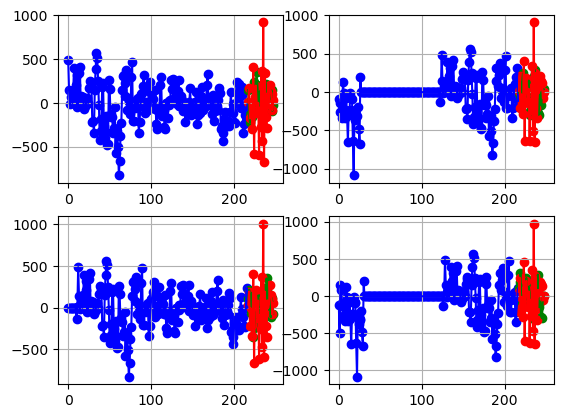

epoch = 0000, grad_step = 000031, tr_loss (epoch) = 115.228, te_loss (epoch) = 47.325
p [[-0.01295312  0.08044    -0.0054741  ...  0.02534345 -0.04793662
   0.03852889]
 [-0.00371186  0.08524904 -0.0304891  ...  0.02227803 -0.04733283
  -0.00694158]
 [ 0.01616765  0.0698454  -0.01908571 ...  0.02321997 -0.06382745
  -0.0241691 ]
 ...
 [ 0.03312694  0.07214651 -0.04295237 ... -0.00438961 -0.03168254
  -0.01164032]
 [ 0.05154669  0.08471276 -0.01133891 ... -0.01247933 -0.0317977
   0.00127465]
 [ 0.02263644  0.07421475 -0.00843633 ... -0.00707387 -0.02704854
   0.01013454]]
p [[-0.02408984  0.04281603  0.0254877  ...  0.01160418 -0.01996647
   0.041665  ]
 [-0.01712909  0.05019822  0.00443814 ...  0.00820205 -0.01484855
  -0.00864259]
 [-0.001881    0.03916465  0.02143532 ...  0.0116229  -0.03283108
  -0.02800936]
 ...
 [ 0.01505375  0.03236257 -0.00150228 ...  0.00051002 -0.00403279
  -0.02060798]
 [ 0.04573986  0.04011012  0.02447768 ... -0.00953237 -0.00504758
  -0.0016465 ]
 [ 0.0136

KeyboardInterrupt: 

In [9]:
def main():
    forecast_length = 31
    backcast_length = 7 * forecast_length
    batch_size = 20  # greater than 4 for viz

    electric = pd.read_csv('data/residual/new_data（residual）.csv', index_col=0, parse_dates=True)
    # True1 = pd.read_csv('data/output_avg - 10.csv', index_col=0, parse_dates=True)
    # electric = pd.read_csv('data/output_avg - Copy - Copy.csv', index_col=0, parse_dates=True)
    print(electric.head())
    electric = electric.values.flatten()  # just keep np array here for simplicity.
    # True1 = True1.values.flatten()

    # data backcast/forecast generation.
    x, y = [], []
    for epoch in range(backcast_length, len(electric) - forecast_length):

        x.append(electric[epoch - backcast_length:epoch])
        y.append(electric[epoch:epoch + forecast_length])
    x = np.array(x)
    # print(x)
    y = np.array(y)
    # print(y)

    # split train/test.
    c = int(len(x) * 0.8)
    print(c)

    x_train, y_train = x[:c], y[:c]
    print(x_train)
    x_test, y_test = x[c:], y[c:]

    # normalization.  归一化
    norm_constant = np.max(x_train)
    x_train, y_train = x_train / norm_constant, y_train / norm_constant
    x_test, y_test = x_test / norm_constant, y_test / norm_constant

    # model
    net = NBeatsNet(
        stack_types=( NBeatsNet.TREND_BLOCK,NBeatsNet.SEASONALITY_BLOCK),
        forecast_length=forecast_length,
        backcast_length=backcast_length,
        hidden_layer_units=128,
        share_weights_in_stack=True
    )
    # net = torch.load("model(jiu).pth")
    optimiser = optim.Adam(lr=1e-4, params=net.parameters())

    grad_step = 0
    for epoch in range(200):
        # train.
        net.train()
        train_loss = []
        for x_train_batch, y_train_batch in data_generator(x_train, y_train, batch_size):
            grad_step += 1
            optimiser.zero_grad()
            _, forecast = net(torch.tensor(x_train_batch, dtype=torch.float).to(net.device))
            criterion_neg = CustomLoss()
            criterion_neg_train = CustomLoss()
            loss = criterion_neg_train(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            # loss = F.mse_loss(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
            train_loss.append(loss.item())
            loss.backward()
            optimiser.step()
        train_loss = np.mean(train_loss)

        # net=torch.load(model.tar)

        # test.
        # net = torch.load("model(jiu).pth")
        net.eval()
        _, forecast = net(torch.tensor(x_test, dtype=torch.float))
        # criterion_neg = CustomLoss()
        criterion_neg_test = CustomLoss()
        test_loss = criterion_neg_test(forecast, torch.tensor(y_train_batch, dtype=torch.float).to(net.device))
        # test_loss = F.mse_loss(forecast, torch.tensor(y_test, dtype=torch.float)).item()
        p = forecast.detach().numpy()
        print('p',p)
        if epoch % 100 == 0:
            subplots = [221, 222, 223, 224]
            plt.figure(1)
            for plot_id, i in enumerate(np.random.choice(range(len(x_test)), size=4, replace=False)):
                ff, xx, yy = p[i] * norm_constant, x_test[i] * norm_constant, y_test[i] * norm_constant
                plt.subplot(subplots[plot_id])
                plt.grid()
                plot_scatter(range(0, backcast_length), xx, color='b')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), yy, color='g')
                plot_scatter(range(backcast_length, backcast_length + forecast_length), ff, color='r')
            plt.show()

            with torch.no_grad():
                save(net, optimiser, grad_step)
            print(f'epoch = {str(epoch).zfill(4)}, '
                  f'grad_step = {str(grad_step).zfill(6)}, '
                  f'tr_loss (epoch) = {1000 * train_loss:.3f}, '
                  f'te_loss (epoch) = {1000 * test_loss:.3f}')
    #  params=list(net.parameters())
    # for num,param in enumerate(params):
    #     print('numbers:',num)
    #     print(param)
    #     print('+++++++++++++++++++++++++++++')
    # print('forecast',forecast)
    # print('-------------------------------------------------'
    #       '-------------------------------------------------')
    # print('len(forecast)',len(forecast))
    # print('-------------------------------------------------'
    #       '-------------------------------------------------')
    B = forecast.flatten()
    # print('-------------------------------------------------'
    #       '-------------------------------------------------')
    C= B * norm_constant
    # print('-------------------------------------------------'
    #       '-------------------------------------------------')
    NC = C.detach().numpy()
    NNC = NC.tolist()
    # print('NNC',type(NNC))
    # print('-------------------------------------------------'
    #       '-------------------------------------------------')
    # print('NNC=',NNC)
    # print('-------------------------------------------------'
    #       '-------------------------------------------------')
    # print(len(NNC))
    Text=NNC[len(NNC)-31::]
    # print(NNC)

    # 读取原始CSV文件
    df = pd.read_csv('data/residual/new_data（all）.csv')

    # 获取最后30行
    last_30_rows = df.tail(31)

    # 将最后30行写入新的CSV文件
    last_30_rows.to_csv('data/residual/N-data.csv', index=False)

    # 打开CSV文件并读取到pandas数据框中
    df = pd.read_csv('data/residual/N-data.csv')

    # 将列表作为新的一列插入到数据框中
    df.insert(4, 'N-residual', Text)

    # 将更新后的数据框写回到CSV文件中
    df.to_csv('data/residual/N-BEATS-ALL.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

    df = pd.read_csv('data/residual/N-BEATS-ALL.csv')

    df = df.drop(['residual'], axis=1)

    df['all_load'] = df.sum(axis=1,numeric_only=True)

    df = df.drop(['seasonal', 'trend', 'N-residual'], axis=1)

    df.to_csv('data/residual/New_all.csv', index=False)

    # N-mix = pd.read_csv('New_all.csv', index_col=0, parse_dates=True)
    #
    # N-mix = N-mix.values.flatten()

    # Text = N-mix[len(N-mix)-31::]




    # avg=[]
    # # 当len（forecast）< forecast_length
    # if  forecast_length>len(forecast):
    #    for i in range(0,len(forecast)+forecast_length-1):
    #       if i == 0:
    #          avg.append(NNC[i])
    #          pass
    #
    #       elif 0<i<=len(forecast)-1:
    #          N = np.mean(NNC[i:forecast_length * i + 1:6])
    #          avg.append(N)
    #          pass
    #
    #       elif forecast_length-1>=i>len(forecast)-1:
    #          avg.append(np.mean(NNC[i:forecast_length * i + 1:6]))
    #          pass
    #
    #       elif len(forecast) + forecast_length - 2 > i > forecast_length-1:
    #          j = i - forecast_length + 1
    #          avg.append(np.mean(NNC[i + 6 * j:len(NNC):6]))
    #          pass
    #
    #       else:
    #          c = i - forecast_length+1
    #          avg.append(NNC[ i + c * 6 ])
    #          pass
    #    pass
    #
    # # 当len（forecast）= forecast_length
    # elif forecast_length == len(forecast):
    #     for i in range(0,len(forecast)+forecast_length-1):
    #       if i == 0:
    #          avg.append(NNC[i])
    #          pass
    #
    #       elif 0<i<=len(forecast)-1:
    #          N = np.mean(NNC[i :4 * i + 1 : 6])
    #          avg.append(N)
    #          pass
    #
    #       elif len(forecast) + forecast_length - 2 > i > forecast_length-1:
    #          j = i - forecast_length + 1
    #          avg.append(np.mean(NNC[i + 6 * j:len(NNC):6]))
    #          pass
    #
    #       else:
    #          c = i - forecast_length+1
    #          avg.append(NNC[ i + c * 6 ])
    #          pass
    #     pass
    #
    # # 当len（forecast）> forecast_length
    # else:
    #     for i in range(0,len(forecast)+forecast_length-1):
    #       if i == 0:
    #          avg.append(NNC[i])
    #          pass
    #
    #       elif 0<i<=forecast_length-1:
    #          N = np.mean(NNC[i:forecast_length * i + 1:6])
    #          avg.append(N)
    #          pass
    #
    #       elif len(forecast)-1>i>forecast_length-1:
    #          t = i - forecast_length
    #          avg.append(np.mean(NNC[i + 6 * t : len(NNC) - (len(forecast)-i) * forecast_length - 1 : 6]))
    #          pass
    #
    #       # 在这里下端触底了
    #       elif len(forecast) + forecast_length - 2 > i >= len(forecast)-1:
    #          j = i - forecast_length + 1
    #          avg.append(np.mean(NNC[i + 6 * j:len(NNC) - 1 : 6]))
    #          pass
    #
    #       else:
    #          c = i - forecast_length+1
    #          avg.append(NNC[ i + c * 6 ])
    #          pass
    #     pass
    #
    # print('avg',avg)
    # print(type(avg))
    # print(electric)
    # print(len(electric))
    # print(type(electric))
    # TRU = True1[len(True1)-31::]
    # print('TRU',TRU)
    # print('TRU',len(TRU))
    # print(type(TRU))




    #
    # # MAPE
    #
    # APE=[]
    # for day in range(len(TRU)):
    #     per_err = (TRU[day] - Text[day]) / TRU[day]
    #     per_err = abs(per_err)
    #     APE.append(per_err)
    #     MAPE = sum(APE)/len(APE)
    # print(len(TRU),'天总共预测电量的mape的平均值')
    # print('mape :',round(MAPE, 2))
    # print('mape % :',round(MAPE*100, 2),'%')
    # print('---------------------------------------------')
    # EVE=[]
    # for day in range(len(TRU)):
    #     per_err1 = abs((TRU[day] - Text[day]) / TRU[day])
    #     EVE.append(per_err1*100)
    # print(EVE)
    #

    #
    #
    #
    #
    #
    #
    # params=list(net.parameters())
    # for num,param in enumerate(params):
    #     print('numbers:',num)
    #     print(param)
    #     print('+++++++++++++++++++++++++++++')
    torch.save(net,'model(residual8).pth')










if __name__ == '__main__':
    main()

In [23]:
    Text = pd.read_csv('data/residual/New_all.csv', index_col=0, parse_dates=True)
    print(Text.head())
    Text = Text.values.flatten()
    Text = Text[len(Text)-31::]
    print('Text',Text)
    True1 = pd.read_csv('data/output_avg - 8.csv', index_col=0, parse_dates=True)
    TRU = True1.values.flatten()
    TRU = TRU[len(TRU)-31::]
    print(TRU)

    # MAPE

    APE=[]
    for day in range(len(TRU)):
        per_err = (TRU[day] - Text[day]) / TRU[day]
        per_err = abs(per_err)
        APE.append(per_err)
        MAPE = sum(APE)/len(APE)
    print(len(TRU),'天总共预测电量的mape的平均值')
    print('mape :',round(MAPE, 2))
    print('mape % :',round(MAPE*100, 2),'%')
    print('---------------------------------------------')
    EVE=[]
    for day in range(len(TRU)):
        per_err1 = abs((TRU[day] - Text[day]) / TRU[day])
        EVE.append(per_err1*100)
    print(EVE)

                all_load
date                    
2010-08-01   8277.323541
2010-08-02   9680.782305
2010-08-03  10234.260880
2010-08-04   9660.574458
2010-08-05   9746.760884
Text [ 8277.32354135  9680.78230536 10234.26088045  9660.57445753
  9746.76088448  9862.28383601  9367.96168564  8985.74760573
  9717.07329247 10224.37063359  9550.3023994   9644.71647928
  9606.19680279  8818.54198078  8132.25386304  8983.10468143
  9826.15467556  9511.01793505  8927.93070877  8944.26892928
  8676.9720328   8301.57685597  9385.1547474   9691.15822739
  9260.91872068  9566.60185447  9371.03365412  8892.80971593
  8397.15425365  9003.96506729  9543.1951705 ]
[8445.587083 9879.435625 9950.910208 9664.97125  9826.524375 9923.18
 9290.955417 8969.826458 9728.34625  9962.573542 9597.495417 9790.642708
 9528.689167 8725.110208 8272.383958 9145.61625  9615.256042 9525.764167
 8834.543333 8925.075208 8631.614792 8520.126042 9578.19375  9271.03375
 9309.197917 9524.623542 9362.764792 8813.063125 8459.92770

In [5]:
import csv

# 生成示例列表
my_list = [1, 2, 3, 4, 5]

# 打开CSV文件，使用'w'模式写入数据
with open('data/121212.csv', mode='a', newline='') as csv_file:
    # 创建CSV写入器
    csv_writer = csv.writer(csv_file)

    # 循环遍历列表中的每个元素，写入CSV文件中
    for item in my_list:
        csv_writer.writerow([item])


In [12]:
import csv
import pandas as pd

# 生成示例列表
my_list = [1, 2, 3, 4, 5]

# 打开CSV文件并读取到pandas数据框中
df = pd.read_csv('data/121212.csv')

# 将列表作为新的一列插入到数据框中
df.insert(2, 'New Column', my_list)

# 将更新后的数据框写回到CSV文件中
df.to_csv('my_csv_file.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [16]:
import pandas as pd

# 读取原始CSV文件
df = pd.read_csv('new_data（all）.csv')

# 获取最后30行
last_30_rows = df.tail(30)

# 将最后30行写入新的CSV文件
last_30_rows.to_csv('新文件.csv', index=False)